# Homework 6: Quadratic programs

Name:      Zihao Qiu  
Email:     zqiu34@wisc.edu  
Campus ID: 9079810942

## 1. Voltage smoothing

The original plot is:

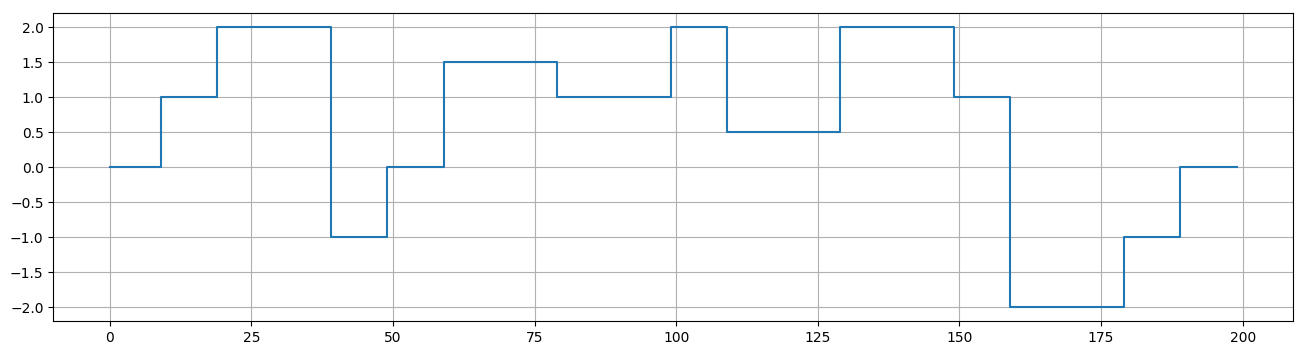

In [4]:
using PyPlot

y = readcsv("/home/qiuzihao/Desktop/CS524/HW6/voltages.csv")
figure(figsize=(16,4))
step(0:199, y)
grid("on")

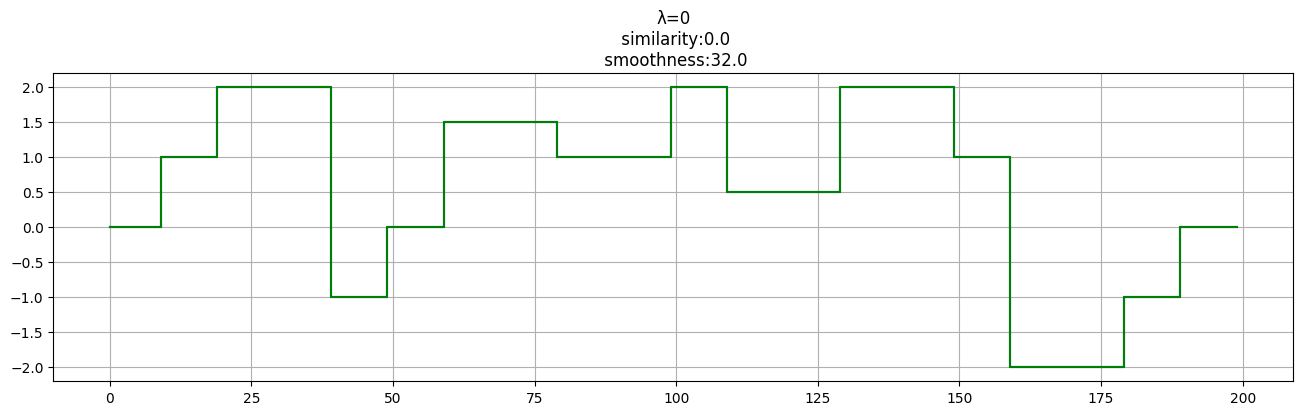

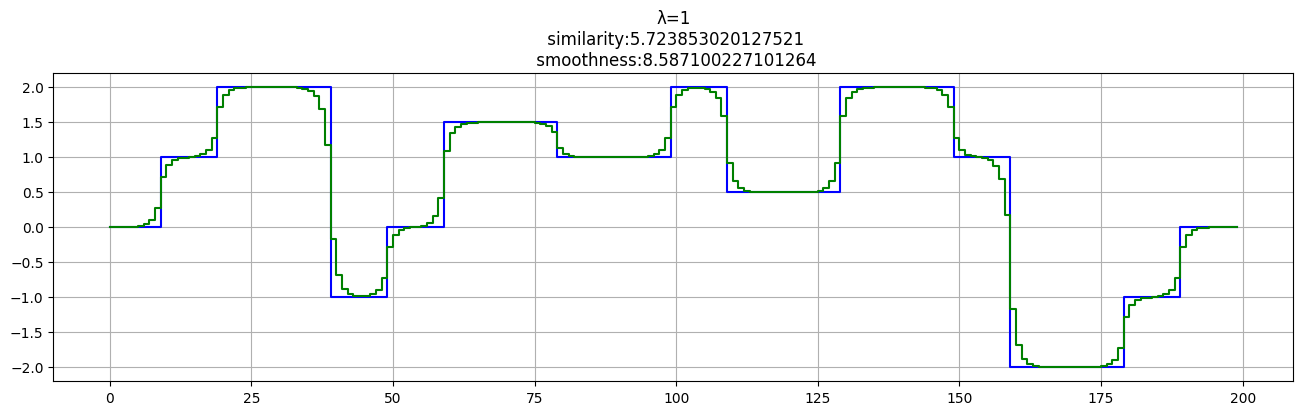

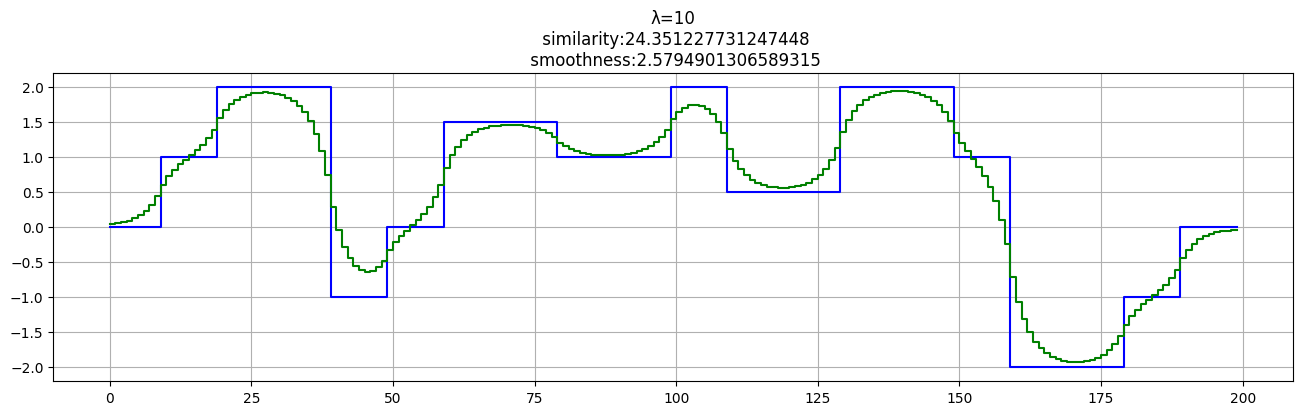

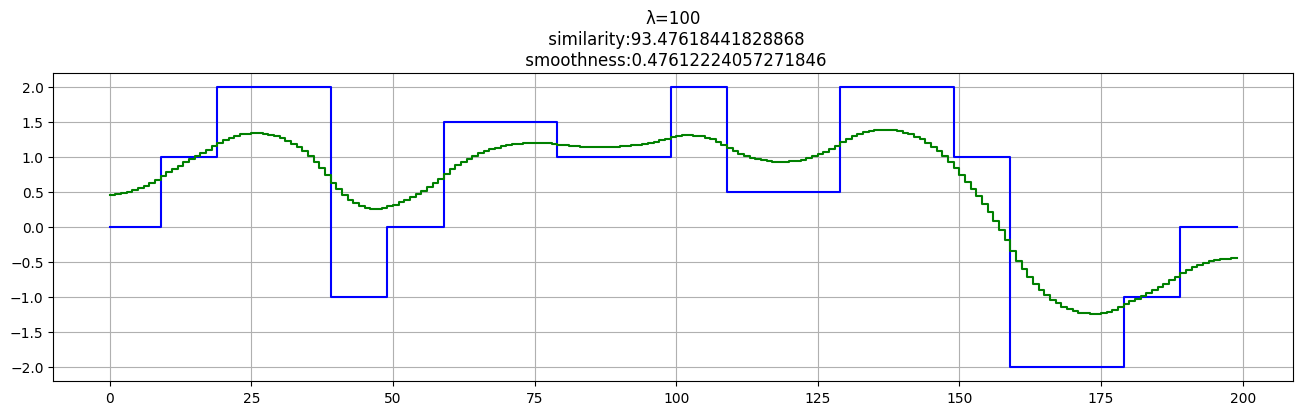

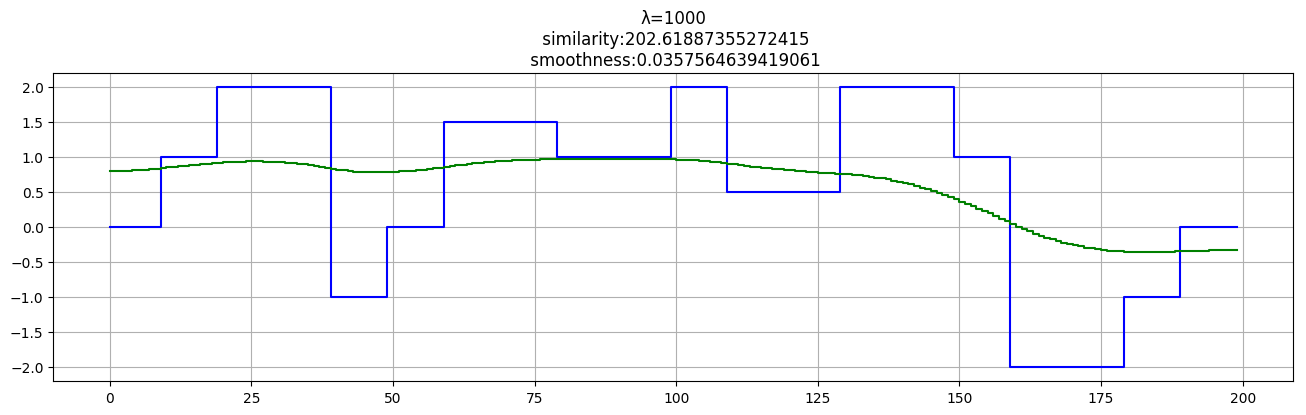

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [18]:
using JuMP, Gurobi, PyPlot

λ_all = [0, 1, 10, 100, 1000]      # tradeoff parameter

for λ in λ_all
    
    m = Model(solver=GurobiSolver(OutputFlag=0))

    @variable(m, v[1:200])
    @objective(m, Min, sum((y-v).^2) + λ*sum{(v[i+1]-v[i])^2, i=1:199})

    solve(m)

    # println("λ:", λ)
    sim = sum((y-getvalue(v)).^2)
    # println("similarity:", sim)

    smth = 0
    for i in 1:199
        smth = smth + (getvalue(v)[i+1] - getvalue(v)[i])^2
    end

    # println("smoothness:", smth)

    figure(figsize=(16,4))
    step(0:199, y, color="blue")
    step(0:199, getvalue(v), color="green")
    title("λ="*string(λ)*"\n similarity:"*string(sim)*"\n smoothness:"*string(smth))
    grid("on")
    
end

You can see that when $\lambda$ is getting bigger, similarity(${\lVert y - v \rVert}^{2}$, y is the original voltages and v is the processed voltages) is getting bigger and bigger, smoothness(R(v)) is getting smaller and smaller.

## 2. Quadratic form positivity

### (a)

It's not difficulty.

$\it{Q}$ is
$
\begin{bmatrix}
    2 & 4 & -3 \\
    4 & 2 & -3 \\
   -3 & -3 & 9
\end{bmatrix}
$
and $\it{v}$ is
$
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix}
$

### (b)

In [21]:
Q = [[2 4 -3]; [4 2 -3]; [-3 -3 9]]

3x3 Array{Int64,2}:
  2   4  -3
  4   2  -3
 -3  -3   9

In [22]:
(L, U) = eig(Q)

([-1.9999999999999996,3.000000000000001,12.0],
3x3 Array{Float64,2}:
  0.707107  -0.57735  -0.408248
 -0.707107  -0.57735  -0.408248
  0.0       -0.57735   0.816497)

We can see that one of the eigenvalue of $\it{Q}$ is -2, so $\it{Q}$ is not Positive definite. In other word, the set $\it{v}^{T}\it{Q}\it{v}$ is not an ellipsoid.

### (c)

First, $\it{Q}$ equals U \* diagm(L) * U'. The meanings of U and L are the same to (b).  
Then, diagm(L) can be written as the difference of two PSD matrices:  
$ 
\begin{bmatrix}
  -2 & 0 & 0 \\
   0 & 3 & 0 \\
   0 & 0 & 12
\end{bmatrix}
=
\begin{bmatrix}
   0 & 0 & 0 \\
   0 & 3 & 0 \\
   0 & 0 & 12
\end{bmatrix}
-
\begin{bmatrix}
   2 & 0 & 0 \\
   0 & 0 & 0 \\
   0 & 0 & 0
\end{bmatrix} 
$  
So 
$\it{Q}=U
\begin{bmatrix}
   0 & 0 & 0 \\
   0 & 3 & 0 \\
   0 & 0 & 12
\end{bmatrix} U^{T} - U
\begin{bmatrix}
   2 & 0 & 0 \\
   0 & 0 & 0 \\
   0 & 0 & 0
\end{bmatrix} U^{T}
$

We can see that by using Julia:

In [23]:
M = [[0 0 0]; [0 3 0]; [0 0 12]]
N = [[2 0 0]; [0 0 0]; [0 0 0]];
U*M*U' - U*N*U'

3x3 Array{Float64,2}:
  2.0   4.0  -3.0
  4.0   2.0  -3.0
 -3.0  -3.0   9.0

So we can define:  
$
A = U
\begin{bmatrix}
   0 & 0 & 0 \\
   0 & \sqrt{3} & 0 \\
   0 & 0 & \sqrt{12}
\end{bmatrix}
U^{T}
$  
$
B = U
\begin{bmatrix}
   \sqrt{2} & 0 & 0 \\
   0 & 0 & 0 \\
   0 & 0 & 0
\end{bmatrix}
U^{T}
$  
$
v = 
\begin{bmatrix}
   x \\
   y \\
   z
\end{bmatrix}
$

And U is:

In [24]:
U

3x3 Array{Float64,2}:
  0.707107  -0.57735  -0.408248
 -0.707107  -0.57735  -0.408248
  0.0       -0.57735   0.816497

U is an orthgonal matrix:

In [26]:
U*U'

3x3 Array{Float64,2}:
  1.0          -8.32667e-17  1.11022e-16
 -8.32667e-17   1.0          1.11022e-16
  1.11022e-16   1.11022e-16  1.0        

After that, we have:  
$
\begin{align*}
{\lVert \it{Av} \rVert}^{2} - {\lVert \it{Bv} \rVert}^{2} &= (\it{Av})^{T}(\it{Av}) - (\it{Bv})^{T}(\it{Bv}) \\
&= \it{v}^{T}\it{A}^T\it{A}\it{v} - \it{v}^{T}\it{B}^T\it{B}\it{v} \\
&= \it{v}^{T}(\it{A}^T\it{A} - \it{B}^T\it{B})\it{v} \\
&= \it{v}^{T}(
U
\begin{bmatrix}
   0 & 0 & 0 \\
   0 & 3 & 0 \\
   0 & 0 & 12
\end{bmatrix} U^{T} - U
\begin{bmatrix}
   2 & 0 & 0 \\
   0 & 0 & 0 \\
   0 & 0 & 0
\end{bmatrix} U^{T} )\it{v} \\
&= \it{v}^{T}\it{Q}\it{v} 
\end{align*}
$

We can also show that in Julia:

In [28]:
A = U * [[0 0 0]; [0 sqrt(3) 0]; [0 0 sqrt(12)]] * U'
B = U * [[sqrt(2) 0 0]; [0 0 0]; [0 0 0]] * U'
A'*A + B'*B

3x3 Array{Float64,2}:
  4.0   2.0  -3.0
  2.0   4.0  -3.0
 -3.0  -3.0   9.0

### (d)

Constraint(1) can be written as:  
$v^{T} Q v \leq 1$  
$\it{Q}$ is
$
\begin{bmatrix}
    2 & 4 & -3 \\
    4 & 2 & -3 \\
   -3 & -3 & 9
\end{bmatrix}
$
and $\it{v}$ is
$
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix}
$

Because Q = $U$* $
\begin{bmatrix}
    -2 & 0 & 0 \\
    0 & 3 & 0 \\
    0 & 0 & 12
\end{bmatrix}
$ * $U^T$, let $z$ = $U^T$v.

$U$ is an orthogonal matrix so we have:  
$z = U^T v = U^{-1} v$  
So $v = Uz$ and  
$x^2 + y^2 + z^2 = {\lVert v \rVert}^{2} = v^T v = {(Uz)}^T Uz = z^T U^T U z = z^T z = {\lVert z \rVert}^{2}$

Then constraint(1) can be written as:  
$z^T \begin{bmatrix}
    -2 & 0 & 0 \\
    0 & 3 & 0 \\
    0 & 0 & 12
\end{bmatrix} z \leq 1$

Because we have ${\lVert v \rVert}^{2} = {\lVert z \rVert}^{2}$, assume that we want ${\lVert v \rVert}^{2} = K$ and K is an arbitrary large number. Then the problem can be converted to:  
$
\begin{align}
   & {z_1}^2 + {z_2}^2 + {z_3}^2 =K \\
   & -2 {z_1}^2 + 3{z_2}^2 + 12{z_3}^2 \leq 1
\end{align}
$

To solve these 2 equations, you can fix 1 element(i.e $z_1$) first, then you can get the other 2 elements.  
Finally we can use $v = Uz$ to find (x,y,z), which satisfies constraint(1) and has arbitrarily large magnitude K.

## 3. Lasso regression

### (a)

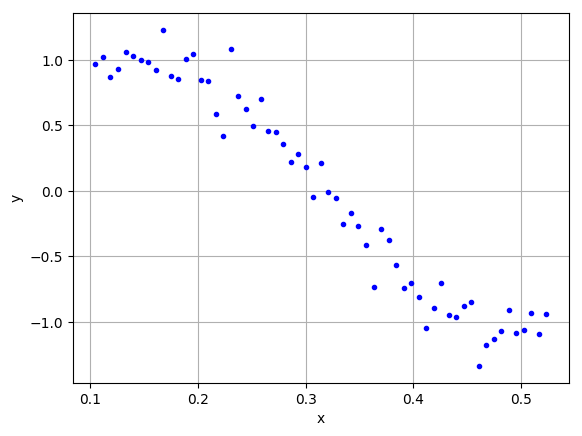

In [35]:
using PyPlot

input = readcsv("/home/qiuzihao/Desktop/CS524/HW6/lasso_data.csv")
x = input[:, 1]
y = input[:, 2]

plot(x,y,"b.")
xlabel("x")
ylabel("y")
grid("on")

d=5:

In [36]:
# degree of polynomial
k = 5

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@objective(m, Min, sum((y-A*u).^2))

status = solve(m)

uopt = getvalue(u)
println(status)
println("uopt:", uopt)
for i = 1:k+1
    println(i, " : ", uopt[i])
end

Academic license - for non-commercial use only
Optimal
uopt:[-320.8731967428688,619.0585086811894,-333.4194441163457,41.12371672368326,2.187770103139084,0.5844566997296379]
1 : -320.8731967428688
2 : 619.0585086811894
3 : -333.4194441163457
4 : 41.12371672368326
5 : 2.187770103139084
6 : 0.5844566997296379


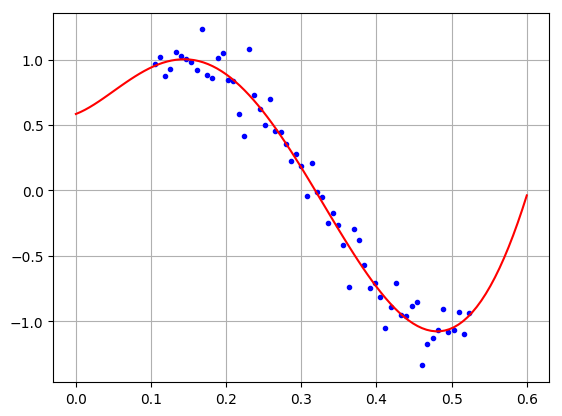

In [37]:
# plot
using PyPlot

npts = 100
xfine = linspace(0, 0.6, npts)
ffine = ones(npts)

for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * uopt

plot(x,y,"b.")
plot(xfine,yfine,"r-")
grid("on")

d=15:

In [38]:
# degree of polynomial
k = 15

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@objective(m, Min, sum((y-A*u).^2))

status = solve(m)

uopt = getvalue(u)
println(status)
println("uopt:", uopt)
println("Error:", sum((y-A*uopt).^2))
for i = 1:k+1
    println(i, " : ", uopt[i])
end

Academic license - for non-commercial use only
Optimal
uopt:[-337904.33099548996,186648.9315302383,74678.93214165365,-4481.846851165752,-17029.34164623774,-8090.891795719973,-745.5020166952792,1319.4777691171607,774.6404170443369,312.9628100689142,-144.16543932857425,-31.68090483298607,18.45937626480768,-40.39346398775334,10.950244335811721,0.22898858100007055]
Error:1.0136441109047114
1 : -337904.33099548996
2 : 186648.9315302383
3 : 74678.93214165365
4 : -4481.846851165752
5 : -17029.34164623774
6 : -8090.891795719973
7 : -745.5020166952792
8 : 1319.4777691171607
9 : 774.6404170443369
10 : 312.9628100689142
11 : -144.16543932857425
12 : -31.68090483298607
13 : 18.45937626480768
14 : -40.39346398775334
15 : 10.950244335811721
16 : 0.22898858100007055


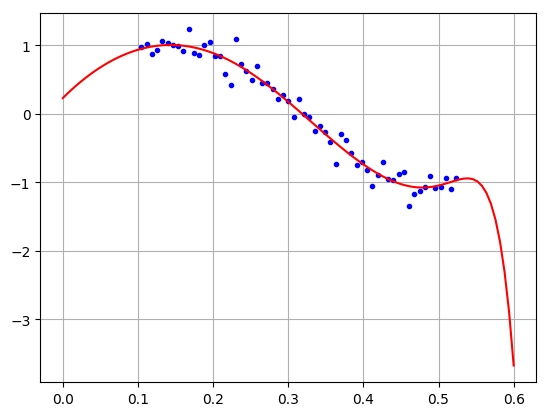

In [39]:
# plot
using PyPlot

npts = 100
xfine = linspace(0, 0.6, npts)
ffine = ones(npts)

for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * uopt

plot(x,y,"b.")
plot(xfine,yfine,"r-")
grid("on")

We can see that the magnitudes of the coefficients are really large and complex.

### (b)

Use $L_{2}$ regularization and d=15, $\lambda=10^{-6}$:

In [40]:
# degree of polynomial
k = 15

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

using JuMP, Gurobi

λ = 1/(10^6)

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@objective(m, Min, sum((y-A*u).^2) + λ*sum(u.^2))

status = solve(m)

uopt = getvalue(u)
println(status)
println("uopt:", uopt)
println("Error:", sum((y-A*uopt).^2))
for i = 1:k+1
    println(i, " : ", uopt[i])
end

Academic license - for non-commercial use only
Optimal
uopt:[-0.5946495192517611,-0.9756810361346531,-1.5499378854145205,-2.354637118408959,-3.351027872815103,-4.295436483309264,-4.510950687550236,-2.58952876012125,3.7101801506260887,16.501023571854294,33.92155577720501,42.07110631285797,11.618828480950553,-55.02809938338697,14.601456560754846,-0.005400954922748249]
Error:1.0168419826436872
1 : -0.5946495192517611
2 : -0.9756810361346531
3 : -1.5499378854145205
4 : -2.354637118408959
5 : -3.351027872815103
6 : -4.295436483309264
7 : -4.510950687550236
8 : -2.58952876012125
9 : 3.7101801506260887
10 : 16.501023571854294
11 : 33.92155577720501
12 : 42.07110631285797
13 : 11.618828480950553
14 : -55.02809938338697
15 : 14.601456560754846
16 : -0.005400954922748249


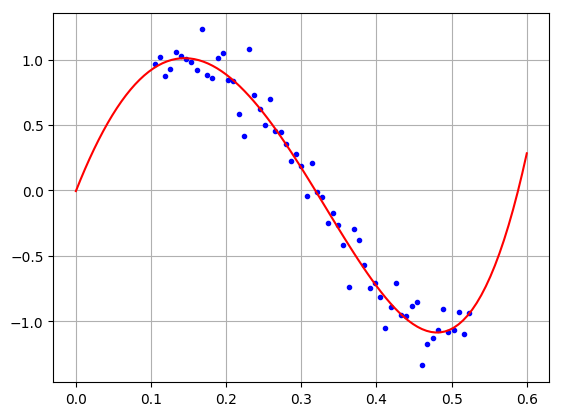

In [41]:
# plot
using PyPlot

npts = 100
xfine = linspace(0, 0.6, npts)
ffine = ones(npts)

for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * uopt

plot(x,y,"b.")
plot(xfine,yfine,"r-")
grid("on")

We can see that after using L2 regularization, the error is getting larger and the magnitudes of the coefficients are getting smaller.

### (c)

Use $L_{1}$ regularization and d=15:

In [49]:
input = readcsv("/home/qiuzihao/Desktop/CS524/HW6/lasso_data.csv")
x = input[:, 1]
y = input[:, 2]

# degree of polynomial
k = 15

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

λ_array = []
error_array = []
nonzero_items = []

using JuMP, Gurobi

for λ in [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]

    m = Model(solver=GurobiSolver(OutputFlag=0))

    # l1-norm
    @variable(m, t[1:k+1])

    @variable(m, u[1:k+1])


    @constraint(m, u .<= t)
    @constraint(m, -t .<= u)

    @objective(m, Min, sum((y-A*u).^2) + λ*sum(t))

    status = solve(m)

    uopt = getvalue(u)
    # println(status)
    # println("uopt:", uopt)
    
    # println("error:", sum((y-A*(getvalue(u))).^2))
    # println("λ:", λ)
    
    push!(λ_array, log10(λ))   
    push!(error_array, sum((y-A*(getvalue(u))).^2))

    nz_items = 0
    # print non-zero items
    for i = 1:k+1
        if abs(uopt[i]) >= 1/(10^5)
            # println(i, " : ", uopt[i])
            nz_items = nz_items + 1
        end
    end
    
    # println("nonzero items:", nz_items)
    push!(nonzero_items, nz_items)

end

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


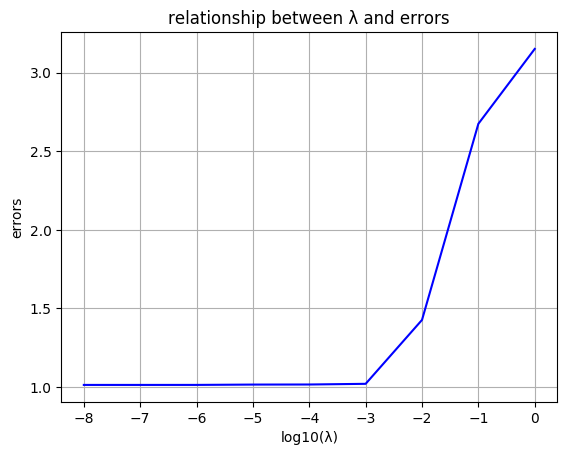

In [50]:
using PyPlot

title("relationship between λ and errors")
plot(λ_array, error_array,"b-")
xlabel("log10(λ)")
ylabel("errors")
grid("on")

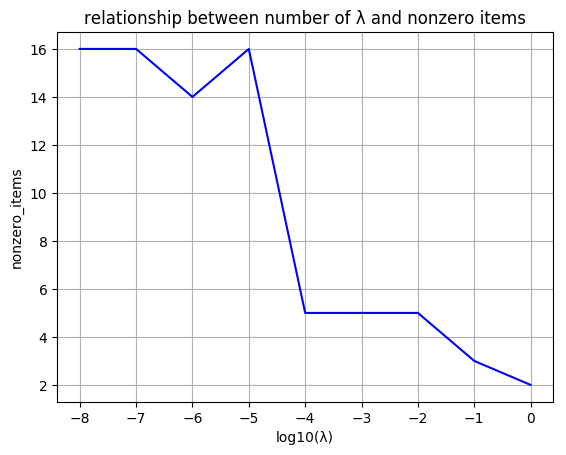

In [51]:
title("relationship between number of λ and nonzero items")
plot(λ_array, nonzero_items, "b-")
xlabel("log10(λ)")
ylabel("nonzero_items")
grid("on")

From the two graphs above, we can see that when $\lambda = 10^{-3}$ we have 5 nonzero items and the error is 1. If $\lambda$ is getting smaller, error will not change but the number of nonzero items will increase. If $\lambda$ is getting bigger, the number of nonzero items will decrease but the error will increase. So I think $\lambda = 10^{-3}$ is a good one. 

At this time the result is:

In [54]:
input = readcsv("/home/qiuzihao/Desktop/CS524/HW6/lasso_data.csv")
x = input[:, 1]
y = input[:, 2]

# degree of polynomial
k = 15

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

using JuMP, Gurobi

λ = 0.001 

m = Model(solver=GurobiSolver(OutputFlag=0))

# l1-norm
@variable(m, t[1:k+1])

@variable(m, u[1:k+1])

@constraint(m, u .<= t)
@constraint(m, -t .<= u)

@objective(m, Min, sum((y-A*u).^2) + λ*sum(t))

status = solve(m)

uopt = getvalue(u)

println(status)
println("uopt:", uopt)    
println("error:", sum((y-A*(getvalue(u))).^2))
     
nz_items = 0
# print non-zero items
for i = 1:k+1
    if abs(uopt[i]) >= 1/(10^5)
        println(i, " : ", uopt[i])
        nz_items = nz_items + 1
    else
        println(i, " : ", 0)
    end
end
    
println("nonzero items:", nz_items)
     

Academic license - for non-commercial use only
Optimal
uopt:[1.5087817643933326e-9,2.97465775529937e-9,5.821147812782919e-9,1.128569565911328e-8,2.162884294468499e-8,4.090805168474777e-8,7.652130538624588e-8,1.438625091863073e-7,2.884232692540998e-7,7.578183578618291e-7,41.18778432041482,50.36533671300703,1.517812821993014e-7,-48.54323558548931,13.034344853110445,0.11914408814258377]
error:1.0208879430149216
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
11 : 41.18778432041482
12 : 50.36533671300703
13 : 0
14 : -48.54323558548931
15 : 13.034344853110445
16 : 0.11914408814258377
nonzero items:5
